<a href="https://colab.research.google.com/github/markzaldivar/MAT422/blob/main/UnconstrainedOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unconstrained Optimization

## Necessary and Sufficient Conditions for Local Minimizers

We begin with the global minimizer.

Let $ f : \mathbb{R}^d \to \mathbb{R} $. The point $ x^* \in \mathbb{R}^d $ is a global minimizer of $ f $ over $ \mathbb{R}^d $
 if

$$
f(x) \geq f(x^*), \quad \forall x \in \mathbb{R}^d. \tag{3.3.2}
$$

Often it is difficult to find a global minimizer unless some special structure is present. Therefore, weaker notions of solution have been introduced.


The local minimizer is similarly defined.

Let $ f : \mathbb{R}^d \to \mathbb{R} $. The point $ x^* \in \mathbb{R}^d $ is a local minimizer of $ f $ over $ \mathbb{R}^d $
if there is a $δ > 0$ such that

$f(x*) \le f(x), \forall x \in B_{\delta}(x*) \backslash \{x*\}$

Consider the following plot, which displays the local and global minima of a given polynomial function.

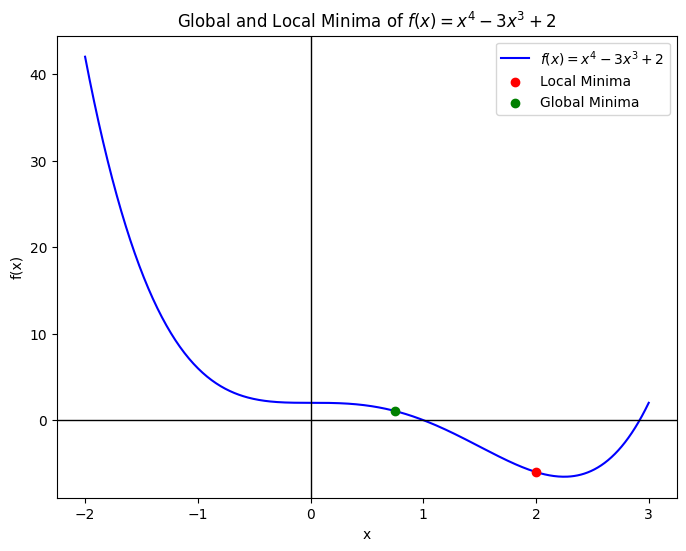

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**4 - 3*x**3 + 2

# Generate values for x
x = np.linspace(-2, 3, 500)

# Calculate corresponding y values
y = f(x)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$f(x) = x^4 - 3x^3 + 2$', color='b')

# Highlight local and global minima
local_min_x = 2
local_min_y = f(local_min_x)
global_min_x = 0.75
global_min_y = f(global_min_x)

plt.scatter(local_min_x, local_min_y, color='r', zorder=5, label='Local Minima')
plt.scatter(global_min_x, global_min_y, color='g', zorder=5, label='Global Minima')

# Labels and title
plt.title('Global and Local Minima of $f(x) = x^4 - 3x^3 + 2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()

# Show the plot
plt.show()


## Convexity and Global Minimizers
A real-valued function is called convex if the line segment between any two points on the graph of the function lies above the graph between the two points. More precisely,

A function $ f : \mathbb{R}^d \to \mathbb{R} $ is convex if, for all $ x, y \in \mathbb{R}^d $ and for all $ \alpha \in [0, 1] $,

$$
f((1 - \alpha)x + \alpha y) \leq (1 - \alpha) f(x) + \alpha f(y).
$$


The convexity of a function can be proven with its Hessian.

$$H_f(x) = \frac{1}{2}[P + P^T]$$

So, f is convex iff $\frac{1}{2}[P + P^T]$ has non-negative eigenvalues.

Consider the following code which demonstrates the convexity of the simple function
$$f(x) = x^2$$

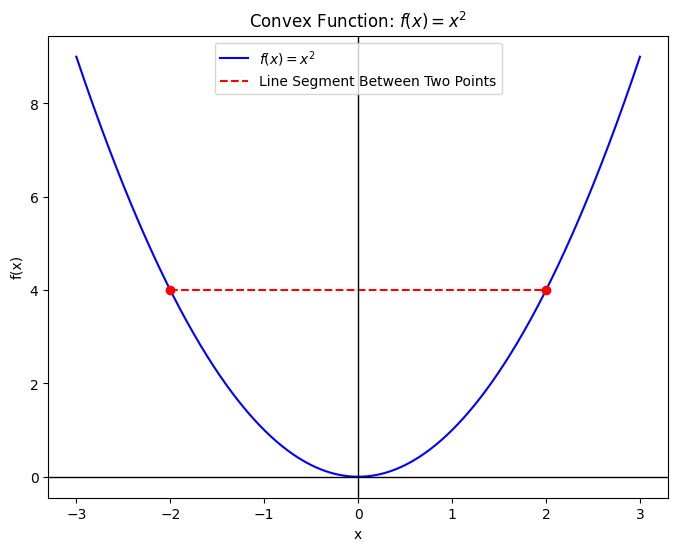

In [2]:
# Define the convex function
def f(x):
    return x**2

# Generate values for x
x = np.linspace(-3, 3, 500)
y = f(x)

# Plot the convex function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$f(x) = x^2$', color='b')

# Choose two points and draw a line segment between them
x1, x2 = -2, 2
y1, y2 = f(x1), f(x2)

# Plot the points
plt.scatter([x1, x2], [y1, y2], color='r', zorder=5)

# Draw the line segment between the two points
plt.plot([x1, x2], [y1, y2], 'r--', label='Line Segment Between Two Points')

# Labels and title
plt.title('Convex Function: $f(x) = x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()

# Show the plot
plt.show()


## Gradient Descent
Gradient descent is an iterative optimization algorithm for finding a local minimum of a differentiable function. The approach is to find smaller values of $f$ by successively following directions in which $f$ decreases. This direction is given by $−∇f$ .

The update rule for gradient descent is:

$$
x_{k+1} = x_k - \alpha_k \nabla f(x_k), \quad k = 0, 1, 2, \dots
$$
for a sequence of step lengths. In general, we will not be able to guarantee that a global minimizer is reached in the limit.


This algorithm is implemented in Python below. The algorithm is used to minimize the same convex function used in the previous example. The results are summarized in a plot.

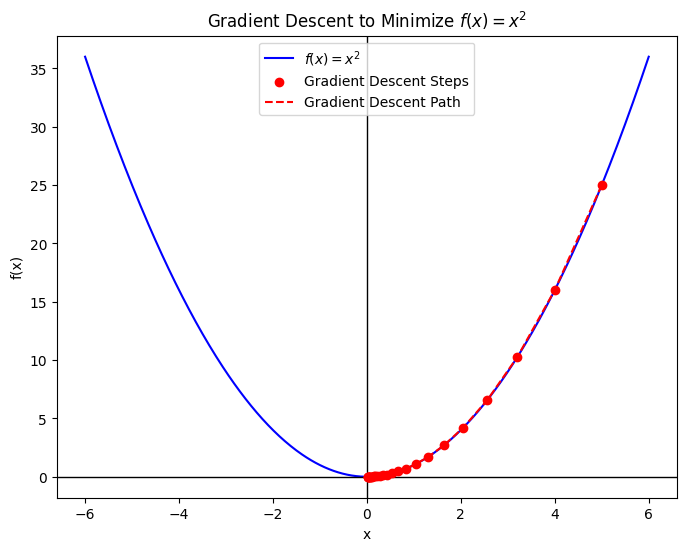

Minimum reached at x = 0.018889465931478583, f(x) = 0.00035681192317649007


In [3]:

# Define the function and its derivative (gradient)
def f(x):
    return x**2

def f_prime(x):
    return 2*x

# Gradient Descent parameters
learning_rate = 0.1  # Step size
x_start = 5          # Starting point for x
n_iterations = 25    # Number of iterations

# Initialize x and store values for plotting
x_values = [x_start]
f_values = [f(x_start)]

# Gradient Descent loop
x = x_start
for _ in range(n_iterations):
    gradient = f_prime(x)
    x = x - learning_rate * gradient  # Update x using gradient descent
    x_values.append(x)
    f_values.append(f(x))

# Plotting the function
x_range = np.linspace(-6, 6, 500)
y_range = f(x_range)

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range, label='$f(x) = x^2$', color='b')
plt.scatter(x_values, f_values, color='r', zorder=5, label='Gradient Descent Steps')
plt.plot(x_values, f_values, 'r--', label='Gradient Descent Path')

# Labels and title
plt.title('Gradient Descent to Minimize $f(x) = x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()

# Show the plot
plt.show()

# Print final x value after gradient descent
print(f"Minimum reached at x = {x_values[-1]}, f(x) = {f_values[-1]}")
